# Anomaly Detection Isolation Fores

In [57]:
import pandas as pd
df=pd.read_csv('healthcare.csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


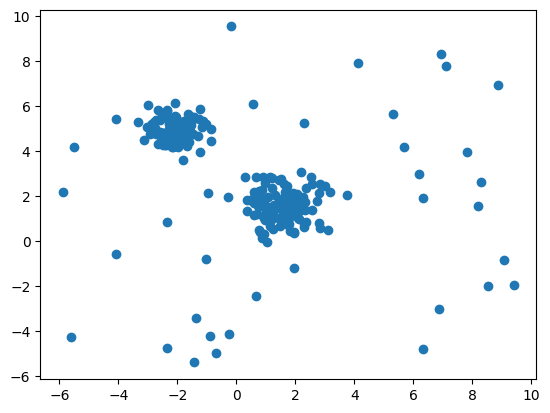

In [58]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [59]:
from sklearn.ensemble import IsolationForest

clf= IsolationForest(contamination='auto') #thershold value
clf.fit(df)
predictions= clf.predict(df)

In [60]:
predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [61]:
import numpy as np
index= np.where(predictions<0)
index

(array([ 20,  24,  45,  48,  53,  55,  63,  72,  74,  78,  83,  85,  87,
         92,  97, 108, 114, 119, 130, 133, 141, 151, 160, 167, 179, 187,
        199, 204, 212, 217, 220, 221, 227, 242, 247, 248]),)

In [62]:
x= df.values # convert into array

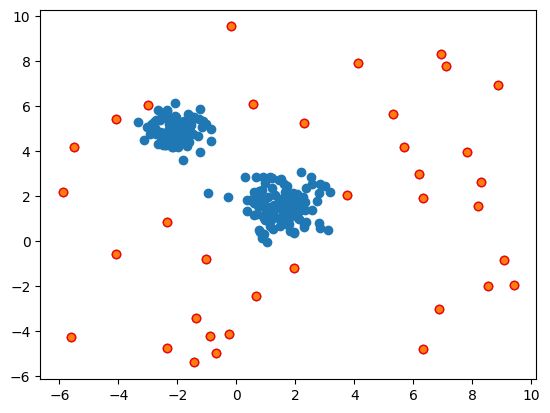

In [63]:
index=  np.where(predictions<0)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index,0], x[index,1], edgecolors='r')

# ---------------------------------------------

In [74]:
data =[[10], [12],  [11], [13], [14], [10], [12], [11], [13]]

# add outliers
data += [[100], [120]]

df= pd.DataFrame(data,columns=['values'])
df

,values
0,10
1,12
2,11
3,13
4,14
5,10
6,12
7,11
8,13
9,100


In [75]:
# Step 3: Build the Isolation Forest model

model= IsolationForest(n_estimators=100,contamination='auto', random_state=42)
model.fit(df[['values']])

IsolationForest(random_state=42)

In [76]:
# Step 4: Get predictions
df['prediction'] = model.predict(df[['values']])

In [77]:
# Step 5: Get anomaly scores
# Lower score = more likely to be anomaly
df['anomaly_score'] = model.decision_function(df[['values']])

In [78]:
df

,values,prediction,anomaly_score
0,10,1,0.023752
1,12,1,0.091285
2,11,1,0.077684
3,13,1,0.077199
4,14,-1,-0.060381
5,10,1,0.023752
6,12,1,0.091285
7,11,1,0.077684
8,13,1,0.077199
9,100,-1,-0.197315


In [79]:
# Define anomalies: usually anomaly_score < 0 means anomaly
df['anomaly'] = df['anomaly_score'] < 0

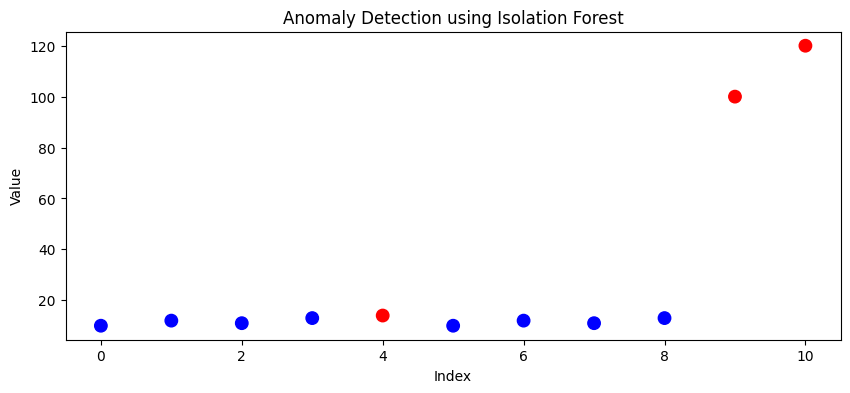

In [80]:
# Step 4: Plot
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df['values'], c=df['anomaly'].map({True: 'red', False: 'blue'}), s=80)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()